In [14]:
#Librairie pour l'analyse du texte

import pandas as pd
import numpy as np
import time

import sklearn
from sklearn import *
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# from sklearn import linear_model
from sklearn.decomposition import TruncatedSVD
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.cross_validation import LeaveOneOut

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import *

In [5]:
# ---------------------------------- 1er choix

# data = pd.read_csv('\Users\k_lemo\Documents\Stage\Data_EPO\data2_0.csv')

# ---------------------------------- 2ième choix

data = pd.read_csv('\Users\k_lemo\Documents\Stage\Data_EPO\data2_1.csv')
data = data.drop(['cpc_2'], axis=1)

In [6]:
# Suppression des STOP WORDS :
# On télécharge l'ensemble des stopwords --> http://www.nltk.org/nltk_data/
# On rassemble "à la main" l'ensemble des stopwords de tous les languages téléchargés (C:\Users\k_lemo\Documents\Stage\stopwords\All.txt)

stopwords = pd.read_csv("\Users\k_lemo\Documents\Stage\stopwords\All.txt", header=None, sep=r"\s+") 
stopWords = [word for word in set(stopwords[0])]
stopwords


# Piste d'optimisation : les stopwords avec des caractères spéciaux ne peuvent pas être détectés lorsqu'il sont sous forme de dataframe
# --> Appliquer le filtre sur le fichier en dur mais cela ralentira considérablement le process

,0
0,og
1,i
2,jeg
3,det
4,at
5,en
6,den
7,til
8,er
9,som


In [7]:
#On Vectorise le champs full_text à l'aide de l'algorithme TF-IDF

start_time = time.time()
tfIdf = TfidfVectorizer(analyzer = "word", stop_words=stopWords,max_features = 100).fit_transform(data['full_text'])
print("--- %s seconds ---" % (time.time() - start_time))

tfIdf

--- 20.6449999809 seconds ---


<10000x100 sparse matrix of type '<type 'numpy.float64'>'
	with 350694 stored elements in Compressed Sparse Row format>

In [20]:
tfIdf2=tfIdf.toarray()

--- 229.52699995 seconds ---


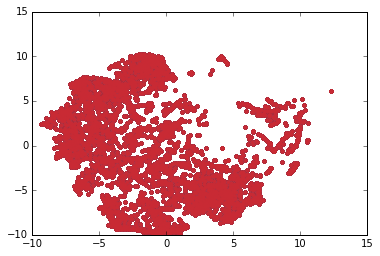

In [42]:
# Actuellement constituée de vecteurs de dimension 100, la représentation de TfIdf est impossible sans une projection en espace bidimensionnel 

start_time = time.time()
tsne = TSNE(n_components=2, init='pca',random_state=0)
X1 = tsne.fit_transform(tfIdf.toarray())
print("--- %s seconds ---" % (time.time() - start_time))

for i in range(len(data.index)):
    #plt.plot(clusters[0][i][0], clusters[0][i][1],'.',color=plt.cm.Set1(clusters[1][i] / float(centers)))
    plt.plot(X1[:,0],X1[:,1],'.',color=plt.cm.Set1(data["CPC1_corresp"][i] / float(len(data["CPC1_corresp"]))))

#X1
#X1[:,0]

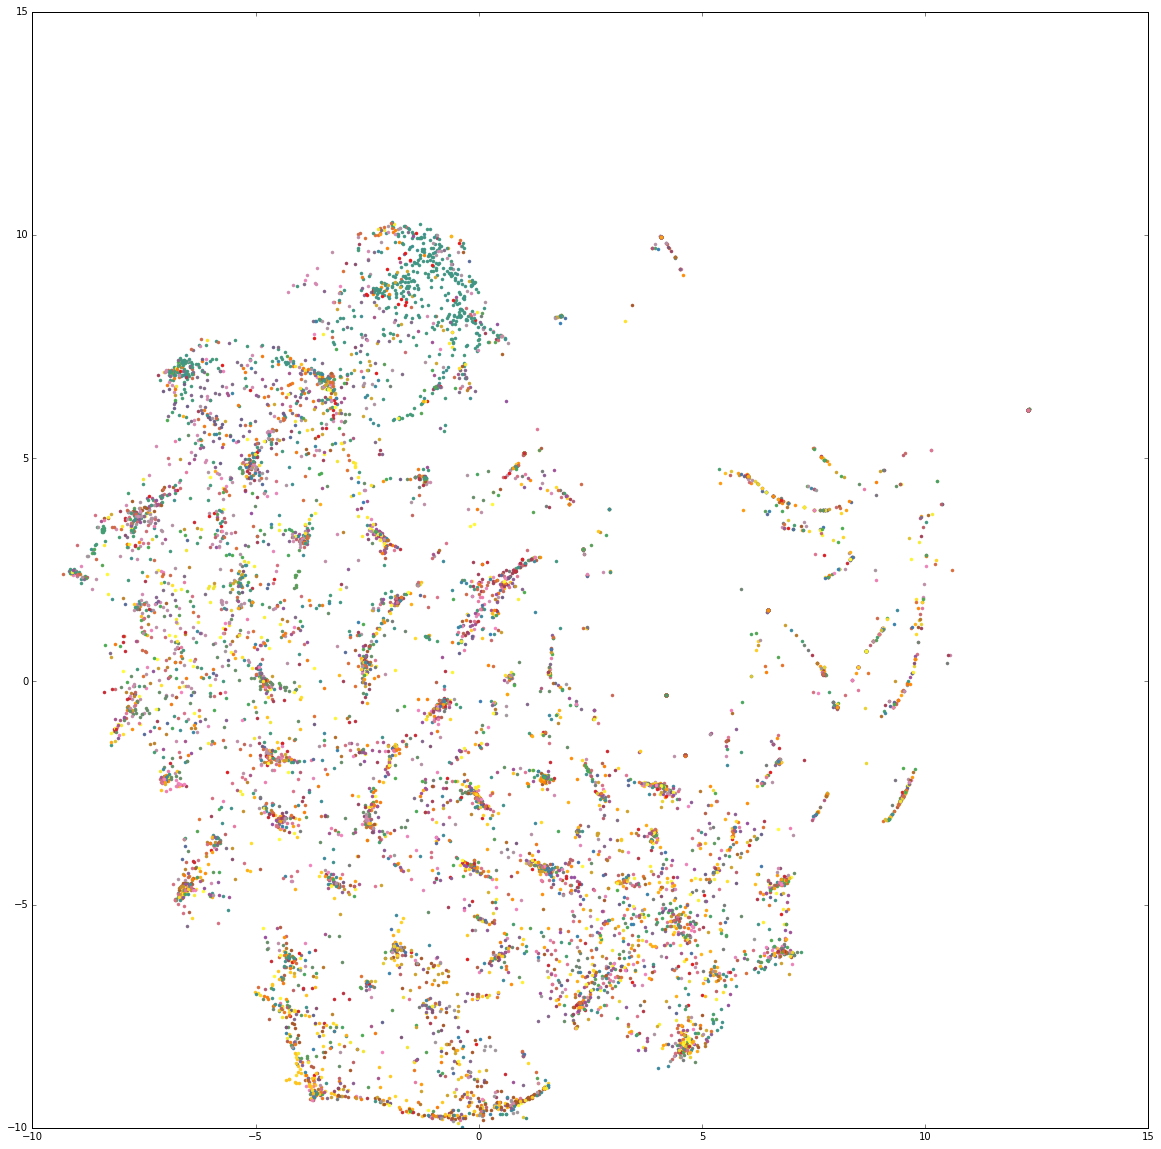

In [65]:
plt.figure(figsize=(20, 20))
for i in range(len(data.index)):
    #plt.plot(clusters[0][i][0], clusters[0][i][1],'.',color=plt.cm.Set1(clusters[1][i] / float(centers)))
    plt.plot(X1[i][0],X1[i][1],'.',color=plt.cm.Set1(data["CPC1_corresp"][i] / float(len(set(data["CPC1_corresp"])))))

In [60]:
print(X1.shape[0])
print(X1.shape[1])
print(X1[0])
print(X1[0][0])
print(X1[0][1])

10000
2
[ 4.61197666 -1.65981485]
4.61197666095
-1.65981484966


In [66]:
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfIdf)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 25: error = 1.1120477, gradient norm = 0.0008767
[t-SNE] Iteration 25: gradient norm 0.000877. Finished.
[t-SNE] Iteration 50: error = 1.0669822, gradient norm = 0.0032908
[t-SNE] Iteration 75: error

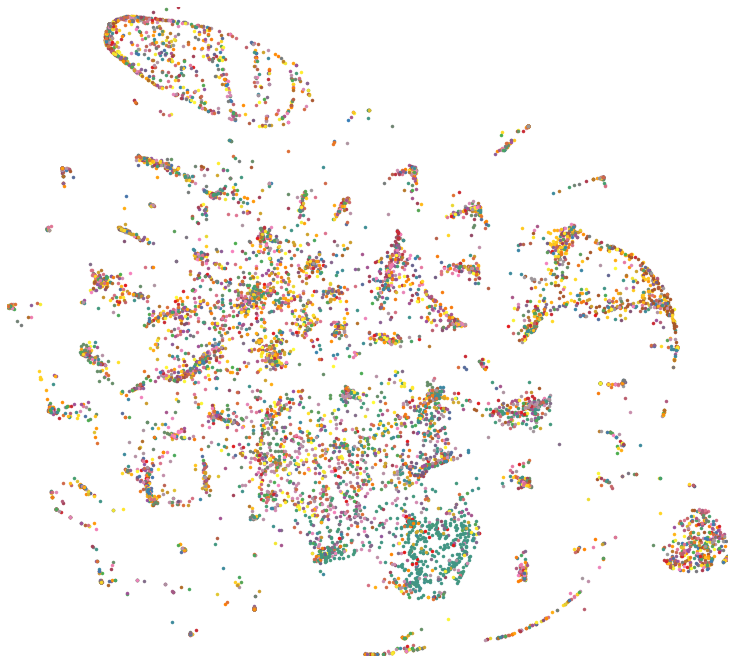

In [69]:
plt.figure(figsize=(10, 10))
plt.setp(plt.axes(frameon=False), xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
for i in range(len(data.index)):
    plt.plot(X_embedded[i][0],X_embedded[i][1],'.',color=plt.cm.Set1(data["CPC1_corresp"][i] / float(len(set(data["CPC1_corresp"])))))

<function matplotlib.pyplot.show>

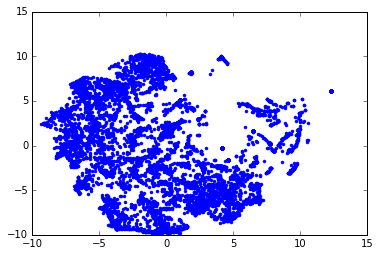

In [6]:
# Affichage 1

%matplotlib inline

plt.plot(X1[:,0],X1[:,1],'.')
plt.show

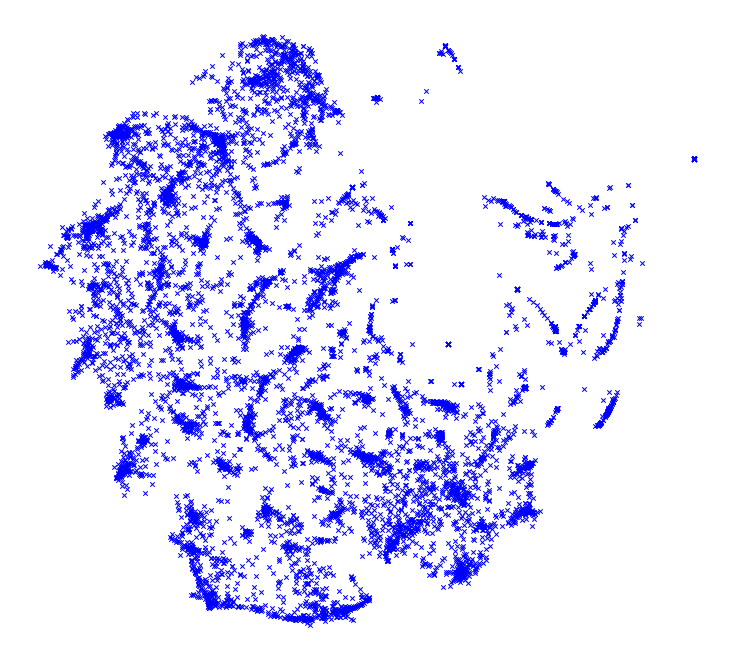

In [64]:
# Affichage 2

plt.figure(figsize=(10, 10))
plt.setp(plt.axes(frameon=False), xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X1[:, 0], X1[:, 1], marker="x")

In [17]:
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfIdf)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 25: error = 1.1120656, gradient norm = 0.0009634
[t-SNE] Iteration 25: gradient norm 0.000963. Finished.
[t-SNE] Iteration 50: error = 1.0695624, gradient norm = 0.0032326
[t-SNE] Iteration 75: error

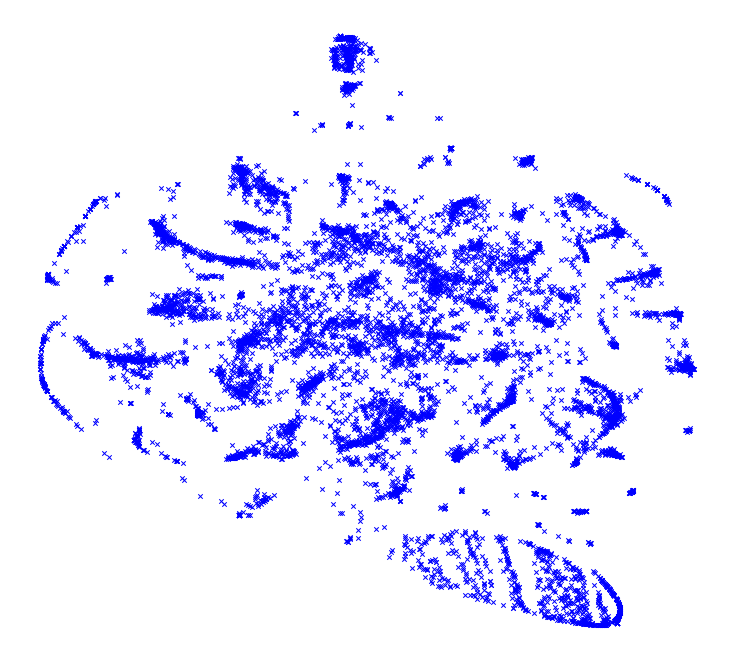

In [19]:
# Affichage 3

plt.figure(figsize=(10, 10))
plt.setp(plt.axes(frameon=False), xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
plt. scatter(X_embedded[:, 0], X_embedded[:, 1], marker="x")

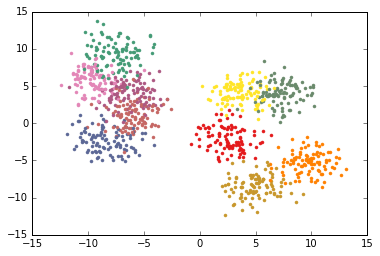

In [26]:
from sklearn import datasets
n_samples = 1000
n_features = 100
centers = 10

clusters = datasets.make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=1.5, 
                               center_box=(-10.0, 10.0), shuffle=True, random_state=None)

for i in range(int(clusters[0].shape[0])):
    plt.plot(clusters[0][i][0], clusters[0][i][1],'.',color=plt.cm.Set1(clusters[1][i] / float(centers)))

In [34]:
X_tsne = TSNE(learning_rate=100).fit_transform(tfIdf2)
X_pca = PCA().fit_transform(tfIdf2)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1])

C:\Users\k_lemo\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: array must not contain infs or NaNs

In [33]:
tfIdf2 = tfIdf.toarray()
# tfIdf2 = tfIdf2.fillna('')

In [38]:
X = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfIdf)
y = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title='TSNE'):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X1.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        
        


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 25: error = 1.1120561, gradient norm = 0.0009648
[t-SNE] Iteration 25: gradient norm 0.000965. Finished.
[t-SNE] Iteration 50: error = 1.0654882, gradient norm = 0.0031832
[t-SNE] Iteration 75: error

In [39]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
              "t-SNE embedding of the digits (time %.2fs)" %
              (time() - t0))

plt.show()

Computing t-SNE embedding


TypeError: 'module' object is not callable

In [13]:
tfIdf2 = tfIdf.toarray()
tfIdf2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.02132829,  0.        ,  0.        , ...,  0.05298037,
         0.        ,  0.        ],
       [ 0.08242111,  0.        ,  0.        , ...,  0.00835663,
         0.00249585,  0.00423268],
       [ 0.05938299,  0.21489506,  0.02117589, ...,  0.00460968,
         0.07709869,  0.02334827]])

In [15]:
# load up data
x_data = tfIdf2

# For speed of computation, only run on a subset
n = 10000
x_data = x_data[:n]

# perform t-SNE embedding
tsne = TSNE(n_components=2, init='pca',random_state=0)
X = tsne.fit_transform(x_data.toarray())

# plot the result
vis_x = vis_data[:, 0]

plt.scatter(vis_x, c=y_data, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
# Affichage T-SNE et classification 

for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9}) 

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

clusters = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
for i in range(int(clusters[0].shape[0])):
plt.plot(clusters[0][i][0], clusters[0][i][1],'o',color=plt.cm.Set1(clusters[1][i] / 10.)) 


In [8]:
# Classification Random Forest


# Définition de la pipeline
rf_clf = Pipeline([('vect', TfidfVectorizer(analyzer = "word",stop_words=stopWords,max_features = 1000)),
                   ('clf', RandomForestClassifier(n_estimators = 150,n_jobs=-1))])

# Chargement des données d'apprentissage et des données à analyser
data_80 = data.sample(frac=0.8)
data_20 = data.loc[~data.index.isin(data_80.index)]

# Apprentissage
tps1 = time.clock()
rf_clf = rf_clf.fit(data_80["full_text"],data_80["cpc_1"])
tps2 = time.clock() 
print "Training done in ",tps2 - tps1," seconds."
print""

# Prédictions
tps1 = time.clock()
result = rf_clf.predict(data_20["full_text"])
tps2 = time.clock() 
print "Predictions done in ",tps2 - tps1," seconds."
print""

# On sauvegarde le resultat
# output = pd.DataFrame( data={"id":data_20["doc_id"], "cpc_1":result} )
# output.to_csv( "\Users\k_lemo\Documents\Stage\Data_EPO\resultat_RF.csv", index=False, quoting=3)

# On calcule le taux de bonnes prédictions
print 'Match rate: ',np.mean(result == data_20["cpc_1"])*100,"%"
print''
print 'Confusion Matrix:'
metrics.confusion_matrix(data_20["cpc_1"],result)

Training done in  68.849848958  seconds.

Predictions done in  56.5761257111  seconds.

Match rate:  25.5 %

Confusion Matrix:


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       ..., 
       [ 0,  0,  0, ...,  1,  3,  0],
       [ 0,  0,  0, ...,  0, 41,  1],
       [ 0,  0,  0, ...,  0,  4,  3]])

In [ ]:
# Leave one out validation

X = data_80
y = data_20
loo = cross_validation.LeaveOneOut(2)
for train_index, test_index in loo:
print("TRAIN:", train_index, "TEST:", test_index)
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
print(X_train, X_test, y_train, y_test)

In [16]:
# Leave One Out 


np.array(df.to_array())


loo = LeaveOneOut(4)
for data_20["cpc_1"], result in loo:
    print("%s %s" % (data_20["cpc_1"], result))

C:\Users\k_lemo\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
# K-Fold Validation

kf = KFold(4, n_folds=2)
for np.data_20["cpc_1"], np.result in kf:
    print("%s %s" % (np.data_20["cpc_1"], np.result))

AttributeError: 'module' object has no attribute 'data_20'

In [18]:
print(np.result)

AttributeError: 'module' object has no attribute 'result'

In [24]:
print(pd.DataFrame(result,data_20["cpc_1"]))

          0
cpc_1      
G06M   E06B
A24D   A24D
A01C   B60S
G01V   H02H
C07C   C07D
A61K   C07D
A61B   A47G
B25C   Y02E
B66D   A61F
A63H   A61F
G02C   A61B
B22D   B22D
C12N   C07D
C07K   A61K
A43D   C12R
B27K   Y02E
G01N   B65D
C07C   C07C
C07D   C07D
C23C   Y02E
C07D   C07C
C08L   A61K
A01G   C07D
C07C   B01J
B65D   B65D
C07C   C07D
C07D   C07C
G03G   C07D
A41D   B65D
A61K   C07D
...     ...
B41F   B41F
C04B   C04B
G03C   C07D
G03F   H01L
G21C   G21C
H01L   H01L
B29D   B29C
A41H   Y02E
A61B   G01R
A61L   A61K
A61K   A61K
A61K   A61K
A61K   C07D
B65B   B65D
B61D   B65D
B65G   B65D
C01G   C07C
C04B   C04B
C07D   C07D
B01J   C07C
C09D   C09D
C11B   C07C
H01L   Y02E
C23C   C25D
D21F   D21H
A47G   E05B
E21B   E21B
G02B   A61F
H01S   H01L
B22D   B22D

[2000 rows x 1 columns]


In [14]:
# Classification SGDC 

# Définition de la pipeline
rf_clf2 = Pipeline([('vect', TfidfVectorizer(analyzer = "word",stop_words=stopWords,max_features = 200)),
                   ('clf', linear_model.SGDClassifier())])

# Chargement des données d'apprentissage et des données à analyser
data_80 = data.sample(frac=0.8)
data_20 = data.loc[~data.index.isin(data_80.index)]

# Apprentissage
tps1 = time.clock()
rf_clf2 = rf_clf2.fit(data_80["full_text"],data_80["cpc_1"])
tps2 = time.clock() 
print "Training done in ",tps2 - tps1," seconds."
print""

# Prédictions
tps1 = time.clock()
result = rf_clf2.predict(data_20["full_text"])
tps2 = time.clock() 
print "Predictions done in ",tps2 - tps1," seconds."
print""


# On calcule le taux de bonnes prédictions
print 'Match rate: ',np.mean(result == data_20["cpc_1"])*100,"%"
print''
print 'Confusion Matrix:'
metrics.confusion_matrix(data_20["cpc_1"],result)

Training done in  27.3601774455  seconds.

Predictions done in  5.82396849033  seconds.

Match rate:  15.2 %

Confusion Matrix:


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 18,  0],
       [ 0,  0,  0, ...,  0,  4,  1]])

In [27]:
import random
def hashLabels(listLabels):
    labels = [i for i in range(len(listLabels))]
    
    hashList = []

    for label in listLabels:
        randomLabel = random.choice(labels)
        hashList.append(randomLabel)
        labels.remove(randomLabel)
    
    return dict(zip(listLabels,hashList))

In [28]:
myLabels = ['A','A1','B','A','C','B','D']
print(hashLabels(list(set(myLabels))))

{'A': 0, 'A1': 3, 'C': 1, 'B': 4, 'D': 2}


In [33]:
list(data["cpc_1"])
labels = hashLabels(list(set(data["cpc_1"])))
print(len(labels))
print(labels)

613
{'D19032000O': 84, 'D04D': 93, 'D04B': 132, 'D04H': 378, 'B62M2027/021': 505, 'B61G': 148, 'B61F': 59, 'B61D': 562, 'B61B': 398, 'B61L': 438, 'B61K': 164, 'F27B': 552, 'B04B': 226, 'F27D': 316, 'D03C': 69, 'D03D': 401, 'D03005000O': 533, 'B44B': 336, 'B44C': 473, 'A23F': 178, 'A23G': 257, 'B44F': 325, 'A23B': 123, 'A23C': 24, 'A23L': 571, 'A23N': 5, 'A23J': 285, 'A23K': 332, 'A23P': 520, 'B68C': 39, 'D27105000O': 455, 'G07D': 113, 'B22D': 509, 'G07G': 188, 'B22C': 597, 'G07B': 198, 'G07C': 376, 'C06B': 591, 'C06F': 486, 'C06D': 15, 'H05B': 474, 'H05G': 173, 'H05F': 26, 'H05K': 545, 'E03D': 305, 'H05H': 77, 'E03B': 209, 'E03C': 251, 'A47B': 63, 'A47C': 273, 'D26076000O': 265, 'A47F': 289, 'A47G': 449, 'A47D': 577, 'A47J': 612, 'A47K': 179, 'A47H': 80, 'F03G': 425, 'A47L': 404, 'F03D': 530, 'A62C': 540, 'A62B': 556, 'A62D': 550, 'E01B': 189, 'E01C': 76, 'D07323000O': 400, 'F24C': 491, 'E01F': 8, 'G01N2291/044': 11, 'B29C': 242, 'H03L': 46, 'C23C': 64, 'C23F': 92, 'C23G': 604, 'C23D':

In [36]:
listCPC_1 = []
for c in range(len(data["cpc_1"])):
    listCPC_1.append(labels[data["cpc_1"][c]])
    
print(listCPC_1)

[305, 333, 144, 175, 233, 291, 189, 35, 542, 522, 89, 560, 395, 191, 7, 423, 216, 300, 390, 440, 128, 460, 322, 460, 528, 352, 411, 611, 119, 489, 206, 128, 580, 102, 594, 283, 322, 315, 57, 504, 57, 227, 330, 175, 480, 11, 587, 195, 361, 168, 509, 104, 91, 423, 571, 175, 434, 114, 317, 193, 114, 295, 259, 114, 180, 589, 207, 539, 114, 457, 360, 354, 250, 594, 542, 272, 9, 193, 604, 322, 97, 442, 565, 119, 293, 110, 219, 74, 491, 423, 114, 370, 114, 394, 189, 64, 97, 394, 354, 114, 29, 105, 466, 29, 423, 242, 43, 114, 125, 175, 168, 381, 278, 423, 225, 104, 7, 119, 102, 228, 268, 594, 509, 111, 594, 487, 255, 97, 217, 281, 195, 111, 119, 187, 589, 104, 260, 357, 104, 114, 284, 315, 491, 187, 224, 584, 114, 317, 114, 119, 214, 597, 340, 128, 106, 301, 512, 114, 104, 381, 168, 581, 114, 594, 46, 168, 104, 457, 500, 594, 248, 212, 423, 235, 346, 594, 329, 116, 357, 545, 145, 283, 315, 449, 457, 119, 344, 423, 475, 125, 503, 460, 206, 242, 180, 504, 154, 326, 274, 110, 162, 158, 114, 150, 

In [40]:
data['CPC1_corresp'] = listCPC_1 

In [41]:
data

,doc_id,cpc_1,full_text,CPC1_corresp
0,294285027,E03D,Die Erfindung ist dadurch gekennzeichnet ...,305
1,294490073,G11B,Darstellung des Brockens und seiner Umgebu...,333
2,296906943,G06M,Verwendung einer Schablone mit mehreren Au...,144
3,294827982,A63H,Das Spiel besteht aus Holzteilen in de...,175
4,328236491,D08303000O,CLAIMThe ornamental design for a handlebar gri...,233
5,325709882,074015000X,It H J HABER METHOD OF TREATING CHARCOA...,291
6,303003293,E01B,The embodiments of the invention in which an e...,189
7,303117077,A61Q,In a hair treating method for imparting cur...,35
8,376604586,C09B,The red pigment preparation method of Fructus ...,542
9,376607600,A24D,A cigarette have rough cylindrical tobacco co...,522
